In [1]:
suppressPackageStartupMessages(library(SingleCellExperiment))
library(scater)


Loading required package: ggplot2



class: SingleCellExperiment 
dim: 34251 5144 
metadata(0):
assays(3): counts logcounts logcounts_raw
rownames(34251): TSPAN6 TNMD ... OR13I1P OR6R2P
rowData names(19): is_feature_control is_feature_control_MTs ...
  feature_symbol feature_id
colnames(5144):
  ELO_PA_Pat52_Screening_BM_PC_080218_Plate1_CD38posCD138pos_SingleCell_A1_S193_rep1_NA
  ELO_ATL_Pat51_EOT_BM_PC_010419_Plate1_CD38posCD138pos_SingleCell_H10_S155_rep1_NA
  ...
  ELO_YA_Pat45_EOT_BM_PC_062519_Plate1_CD38posCD138pos_SingleCell_B4_S24_rep1_NA
  ELO_YA_Pat45_Screening_BME_CD45pos_012418_Plate1_CD45posTN_SingleCell_G6_S239_rep1_NA
colData names(68): sampleName Individual ... Phase SingleRCelltypeAnno
reducedDimNames(2): pagoda_largeVIS pagoda_tSNE
altExpNames(0):

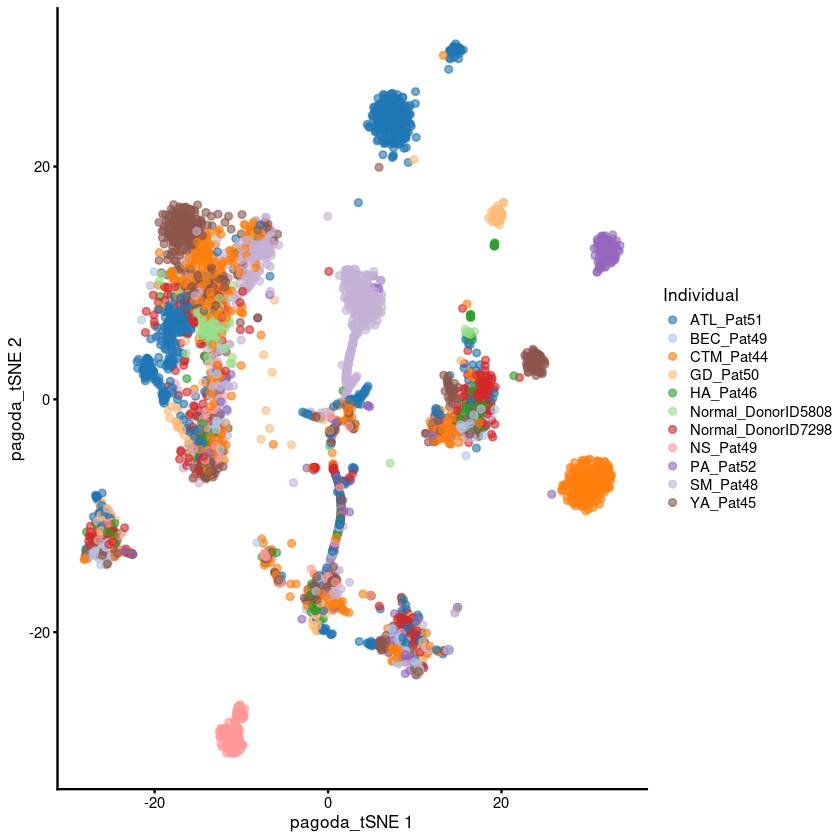

In [2]:
All_combined_ELO<-readRDS("All_combined_ELO_singlecell_annotated_withnormal12_filtered_withIgG_withtSNE_pagodaCellcyle_withcelltypeannotations.rds")
All_combined_ELO

plotReducedDim(All_combined_ELO, "pagoda_tSNE",  colour_by="Individual")

In [4]:
split_string <- strsplit(All_combined_ELO$RunNumber[1:5144], split = "_")
class(split_string)

[1] "list"

In [5]:
fun1 <- function(lst, n){
         sapply(lst, `[`, n)
   }
head(fun1(split_string, 4))
head(fun1(split_string, 1))

All_combined_ELO$RunId<-fun1(split_string, 4)
All_combined_ELO$RunDate<-fun1(split_string, 1)


[1] "AHGYJJBGX9" "AHM7MYBGX9" "AHCF5NBGXB" "AH2WG2BGX9" "AH2WG2BGX9"
[6] "AHTKHLBGX5"

[1] "190111" "190118" "190419" "181005" "181005" "180427"

In [6]:
suppressPackageStartupMessages(library(stringr))
keyword_0="072018|070218|020818|021418|022618|061318|060518|062519|041519|040919|012418|020618|052318|020518|110118|040819|032118|032718|040318|080218|010419|041919|042018|081518|011419|012319|050319|101718|031418|030519|022719|081618|040419"
test_2<-grepl(keyword_0,colnames(All_combined_ELO))
timepoint<-ifelse(test_2==T, str_match(colnames(All_combined_ELO), "_[0-9][0-9][0-9][0-9][0-9][0-9]"), str_match(colnames(All_combined_ELO), "_*[A-Z]*[0-9]_*"))
timepoint<-gsub("_","",timepoint)

table(timepoint)
All_combined_ELO$timepoint <- timepoint

timepoint
010419 011419 012319 012418 020518 020618 020818 021418 022618 022719 030519 
   134     26    161    534    213    207      9    281    128     29      4 
031418 032118 032718 040318 040419 040819 040919 041519 041919 042018 050319 
    64     66     75     14     47    152    169    245    340    292     79 
052318 060518 061318 062519 070218 072018 080218 081518 081618 101718 110118 
   231    120    194    226     94     86    267    187    313      8    149 

In [7]:
library(ggrepel)


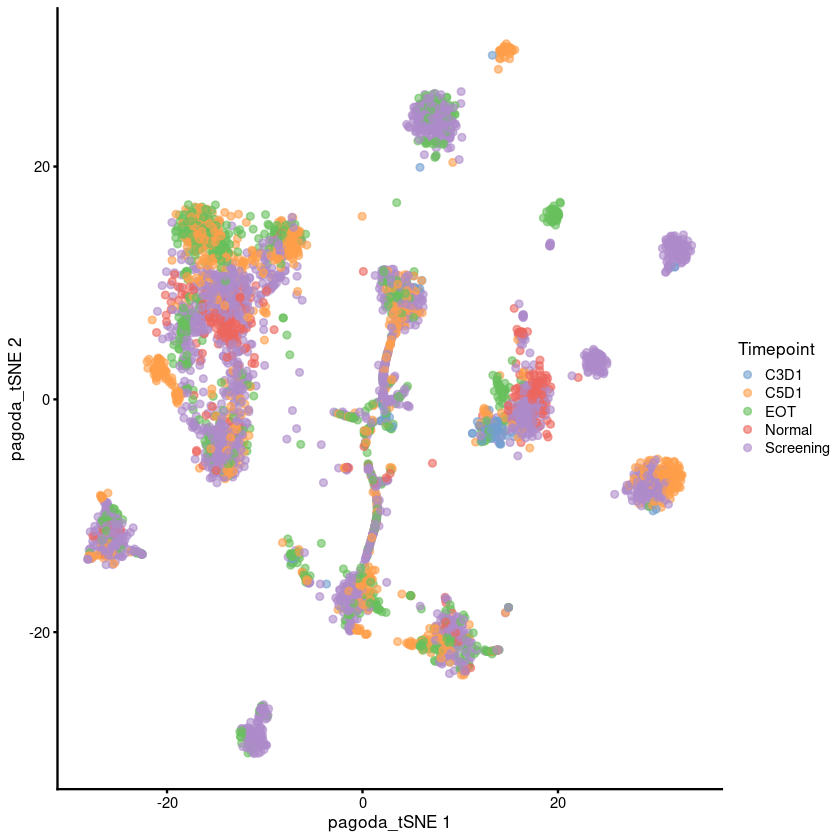

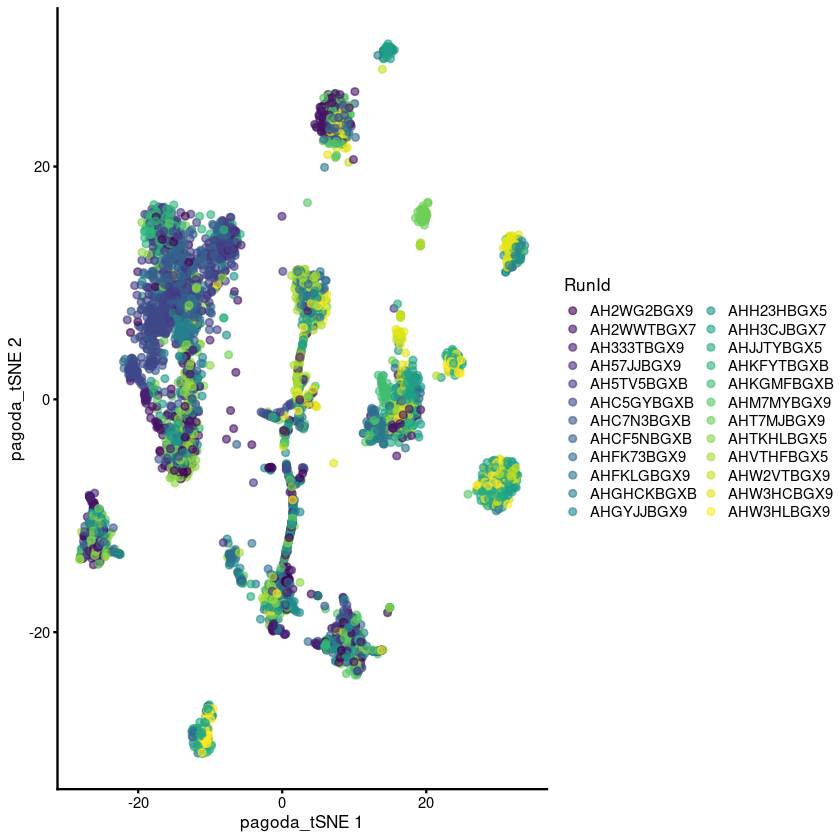

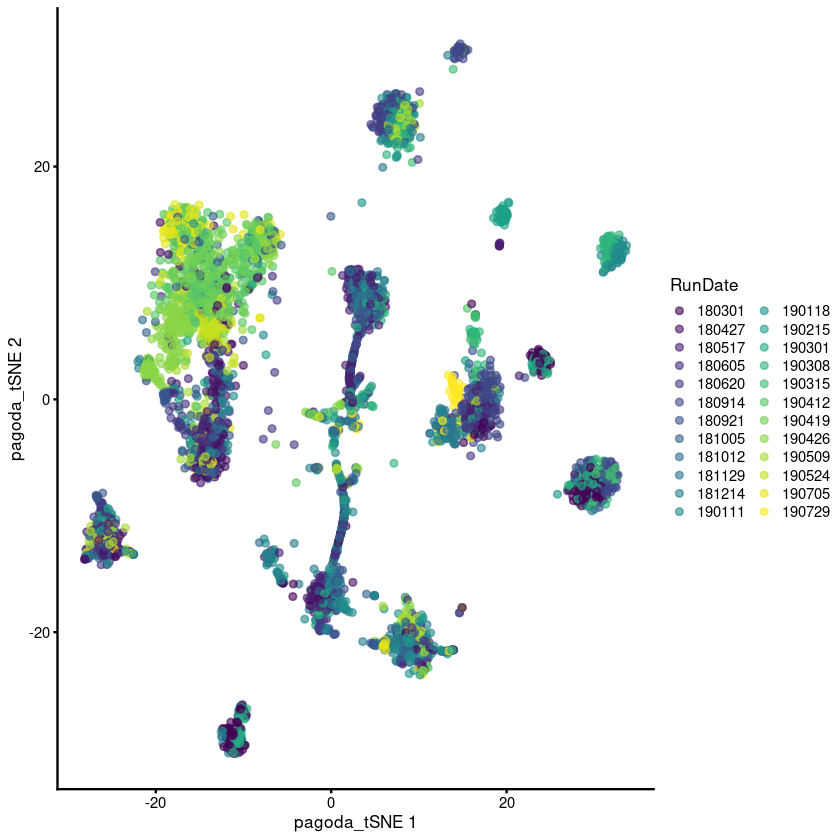

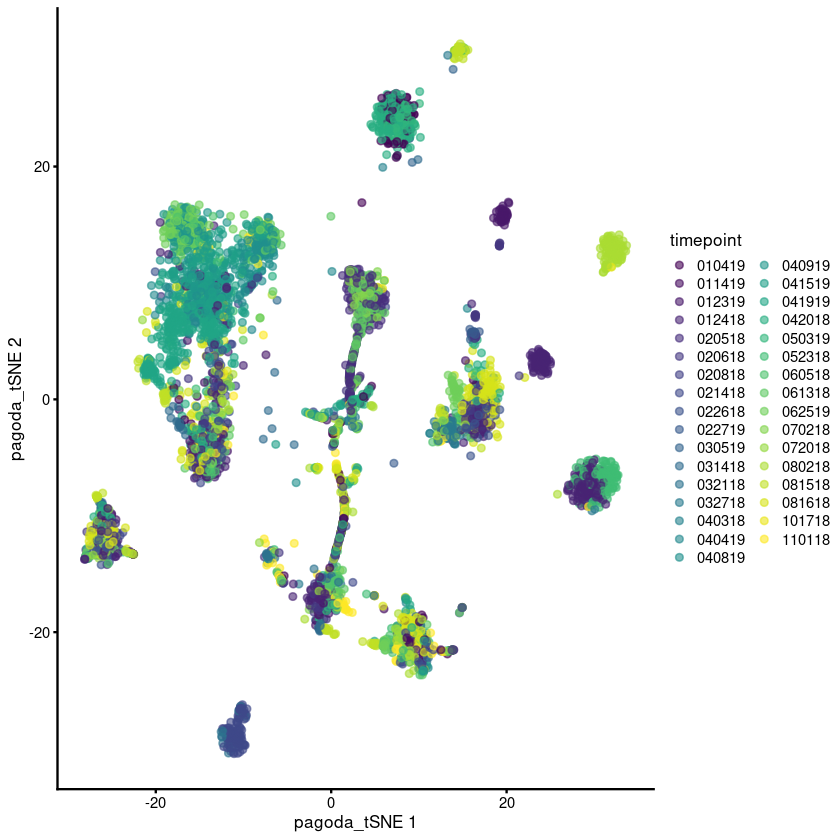

In [85]:
plotReducedDim(All_combined_ELO, "pagoda_tSNE",  colour_by="Timepoint"
#                , text_by = "Timepoint" 
              )

plotReducedDim(All_combined_ELO, "pagoda_tSNE",  colour_by="RunId") 


plotReducedDim(All_combined_ELO, "pagoda_tSNE",  colour_by="RunDate") 

plotReducedDim(All_combined_ELO, "pagoda_tSNE",  colour_by="timepoint") 


Warning message:
“Use of `df$TSNE1` is discouraged. Use `TSNE1` instead.”
Warning message:
“Use of `df$TSNE2` is discouraged. Use `TSNE2` instead.”


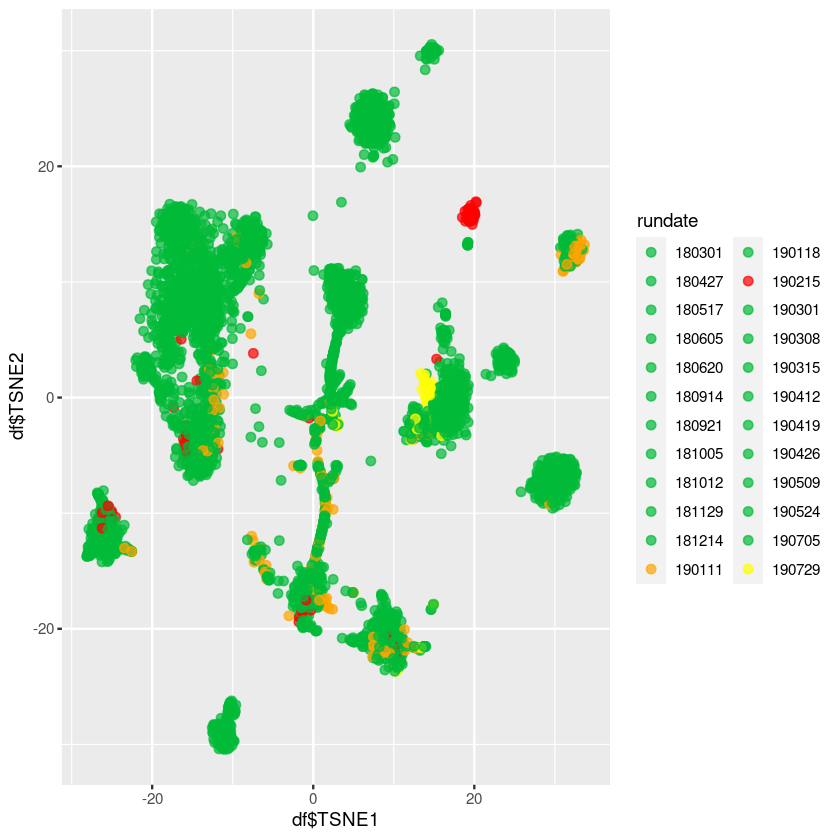

In [8]:
df <- as.data.frame(reducedDims(All_combined_ELO)$pagoda_tSNE)
    colnames(df) <- c("TSNE1","TSNE2")
    df$TSNE1 <- as.numeric(df$TSNE1)
    df$TNSE2 <- as.numeric(df$TSNE2)
    rownames(df) <- c()


rundate<-All_combined_ELO$RunDate



cell_type_color <- c(
                    
     "180301" = "#00BA38","180427" = "#00BA38","180517" = "#00BA38","180605" = "#00BA38",
    "180620" = "#00BA38",
     "180914" = "#00BA38","180921" = "#00BA38","181005" = "#00BA38","181012" = "#00BA38"
    ,"181129" = "#00BA38",
     "181214" = "#00BA38","190111" = "orange","190118" = "#00BA38","190215" = "red"
    ,"190301" = "#00BA38",
     "190308" = "#00BA38","190315" = "#00BA38","190412" = "#00BA38","190419" = "#00BA38"
    ,"190426" = "#00BA38",
     "190509" = "#00BA38", "190524" = "#00BA38", "190705" = "#00BA38", "190729" = "yellow" )





tSNE<-ggplot(df, aes(x=df$TSNE1, y=df$TSNE2)) + geom_point(aes(colour = rundate),alpha = 0.7,size=2.0)+
theme(legend.position="right")+
                    scale_color_manual(
# #                         breaks = c("X", "Y", "Z",""), 
                        values=cell_type_color
                    )
tSNE

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1401 rows containing non-finite values (stat_density).”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1401 rows containing non-finite values (stat_density).”


png 
  2

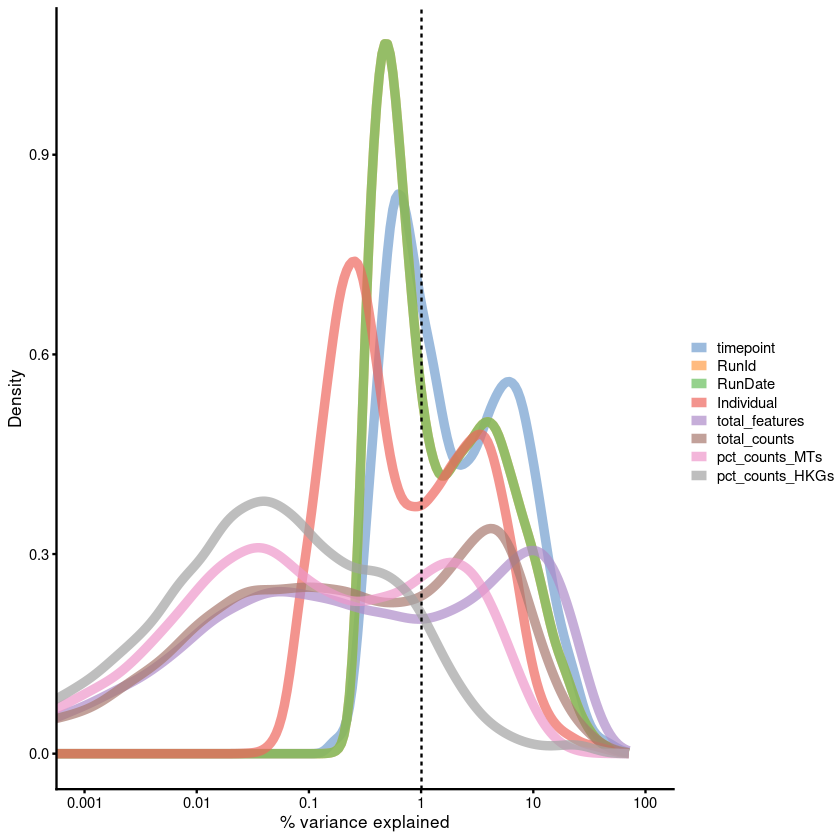

In [8]:
P<-plotExplanatoryVariables(
    All_combined_ELO,
    exprs_values = "logcounts_raw",
    variables = c(
        "total_features",
        "total_counts",
        "RunId",
        "RunDate",
        "timepoint",
        "Individual",
        "pct_counts_HKGs",
        "pct_counts_MTs"
    )
)

P
pdf("scater_batch_effect.pdf")
print(P)
dev.off()

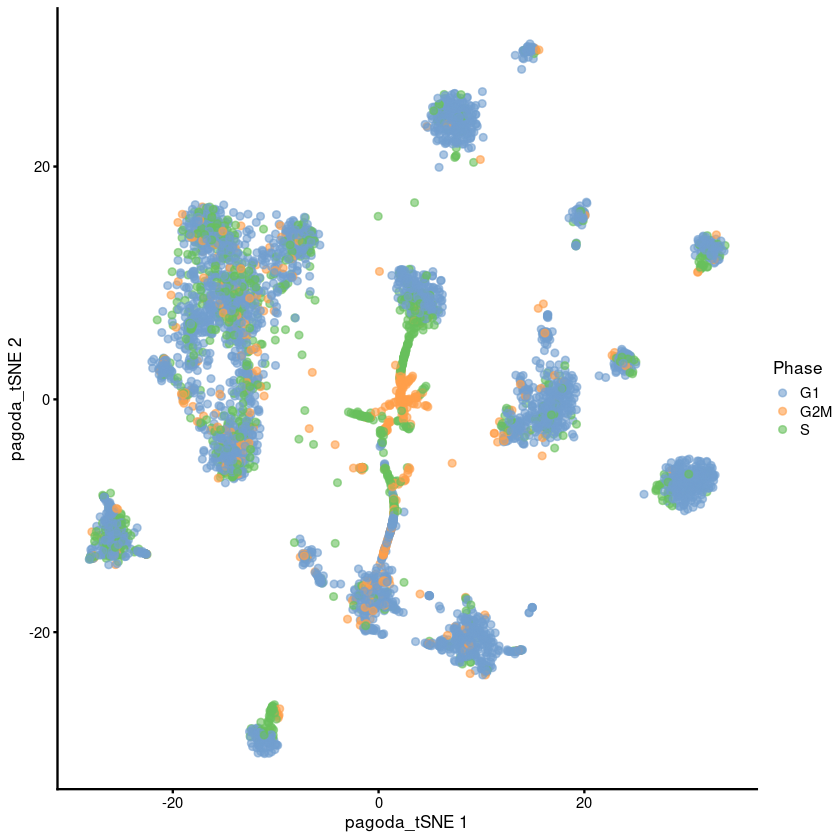

In [9]:
plotReducedDim(All_combined_ELO, "pagoda_tSNE",  colour_by="Phase") 

In [9]:
suppressPackageStartupMessages(library(reshape2))


In [11]:
table(All_combined_ELO$pagoda_multilevel)


 cluster1 cluster10 cluster11 cluster12 cluster13 cluster14 cluster15 cluster16 
      503       397        90       307       310       239       165       426 
cluster17 cluster18 cluster19  cluster2 cluster20  cluster3  cluster4  cluster5 
      287       122       281       113       415       334       177       321 
 cluster6  cluster7  cluster8  cluster9 
      280       175       154        48 

,Phase,cluster,Frequency
,<fct>,<fct>,<int>
1,G1,cluster1,332
2,G2M,cluster1,46
3,S,cluster1,125
4,G1,cluster10,49
5,G2M,cluster10,181
6,S,cluster10,167


png 
  2

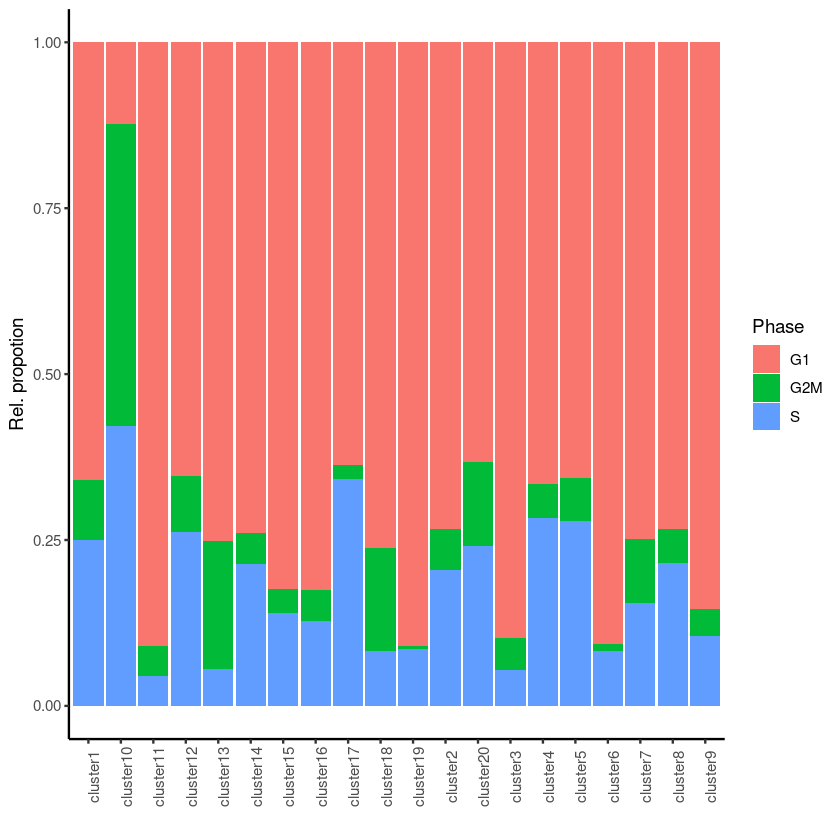

In [12]:
collapsed_phase_celltypes <-table(All_combined_ELO$Phase,All_combined_ELO$pagoda_multilevel)
melted_data <- melt(collapsed_phase_celltypes)
colnames(melted_data) <- c("Phase","cluster","Frequency")
head(melted_data)
# write.csv(melted_data,"BCATs_treatment_vs_cell_type.csv")
melted_data$cluster<-as.character(melted_data$cluster)
melted_data$Frequency <- as.numeric(as.character(melted_data$Frequency))
# melted_data$Patient <- factor(melted_data$Patient, levels=c("BCAT82114","BCAT15776","BCAT17802","BCAT83146","BCAT11929"))

all_phase_plot <- ggplot(melted_data, aes(fill=Phase, y=Frequency, x=cluster)) +
                         geom_bar(stat="identity", position="fill") + theme_classic() +
#                          theme(legend.position = 'none')+ 
                          ylab("Rel. propotion") + xlab("")+ 
                        theme(axis.text.x = element_text(angle = 90))

all_phase_plot

pdf("Elo_Phase_cluster_Plot_sc.pdf")
print(all_phase_plot)
dev.off()


# BATCH Effect

In [ ]:
# https://www.nature.com/articles/s41421-019-0114-x



In [4]:
source('https://raw.githubusercontent.com/jumphone/BEER/master/BEER.R')


[1] "Welcome to BEER (v0.1.7)!"



Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays


Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:IRanges’:

    collapse


This is mgcv 1.8-33. For overview type 'help("mgcv-package")'.

Loading required package: genefilter


Attaching package: ‘genefilter’


The following objects are masked from ‘package:MatrixGenerics’:

    rowSds, rowVars


The following objects are masked from ‘package:matrixStats’:

    rowSds, rowVars


Loading required package: BiocParallel


Attaching package: ‘limma’


The following object is masked from ‘package:scater’:

    plotMDS


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [5]:
DATA<-as.data.frame(logcounts(All_combined_ELO))
DATA

BATCH<-All_combined_ELO$Individual
BATCH

,ELO_PA_Pat52_Screening_BM_PC_080218_Plate1_CD38posCD138pos_SingleCell_A1_S193_rep1_NA,ELO_ATL_Pat51_EOT_BM_PC_010419_Plate1_CD38posCD138pos_SingleCell_H10_S155_rep1_NA,ELO_CTM_Pat44_Screening_BME_CD45pos_041519_Plate1_CD56pos_SingleCell_B6_S42_rep1_NA,AllCells_Normal_DonorID7298_C5D1_BME_CD45pos_081618_Plate1_CD45posTN_SingleCell_H4_S32_rep1_NA,AllCells_Normal_DonorID7298_C5D1_BME_CD45pos_081618_Plate1_CD19pos_SingleCell_C1_S3_rep1_NA,ELO_CTM_Pat44_Screening_BME_CD45pos_012418_Plate1_CD3pos_SingleCell_A10_S361_rep1_NA,ELO_ATL_Pat51_C5D1_BME_CD45pos_041919_Plate1_CD56pos_SingleCell_D7_S148_rep1_NA,ELO_HA_Pat46_Screening_BME_CD45pos_020618_Plate1_CD45posTN_SingleCell_G6_S47_rep1_NA,ELO_YA_Pat45_Screening_BM_PC_012418_Plate1_CD38posCD138pos_SingleCell_E12_S262_rep_1_NA,ELO_CTM_Pat44_C5D1_BM_PC_052318_Plate1_CD38posCD138pos_SingleCell_B4_S122_rep1_NA,⋯,ELO_SM_Pat48_Screening_PB_PC_020518_Plate1_CD38posCD138pos_SingleCell_B1_rep_1_NA,ELO_NS_Pat49_EOT_PB_PC_032118_Plate1_CD38posCD138pos_SingleCell_B11_S334_rep1_NA,ELO_YA_Pat45_EOT_BME_CD45pos_062519_Plate1_CD14pos_SingleCell_E1_S101_rep1_NA,ELO_ATL_Pat51_Screening_PB_PC_042018_Plate1_CD38posCD138pos_SingleCell_C10_S148_rep1_NA,ELO_ATL_Pat51_Screening_BM_PC_050319_Plate2_CD138posCXCR4index_SingleCell_E3_S212_rep1_NA,ELO_ATL_Pat51_Screening_BME_CD45pos_041919_Plate1_CD56pos_SingleCell_F2_S14_rep1_NA,ELO_PA_Pat52_Screening_BM_PC_080218_Plate2_CD38posCD138pos_SingleCell_D12_S284_rep1_NA,ELO_SM_Pat48_C5D1_BME_CD45pos_061318_Plate1_CD45posTN_SingleCell_H1_S104_rep1_NA,ELO_YA_Pat45_EOT_BM_PC_062519_Plate1_CD38posCD138pos_SingleCell_B4_S24_rep1_NA,ELO_YA_Pat45_Screening_BME_CD45pos_012418_Plate1_CD45posTN_SingleCell_G6_S239_rep1_NA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TSPAN6,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000
TNMD,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000
DPM1,1.7374786,5.2394918,0.000000,2.9716828,0.000000,0.000000,4.942616,0.000000,0.000000,3.298074,⋯,6.6083923,0.000000,0.000000,0.000000,3.073294,6.666114,2.057024,6.067097,4.1788596,0.000000
SCYL3,0.0000000,0.0000000,6.719473,0.0000000,0.000000,1.311124,0.000000,0.000000,0.000000,0.000000,⋯,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.367727,5.768732,0.0000000,0.000000
C1orf112,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.592690,6.334705,0.0000000,0.000000
FGR,0.0000000,0.0000000,7.153294,8.2098155,0.000000,2.444678,6.760731,7.589406,0.000000,0.000000,⋯,0.0000000,0.000000,9.603058,0.000000,0.000000,9.239189,0.000000,2.142810,0.0000000,4.692382
CFH,0.0000000,5.3846063,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.0000000,0.000000,0.000000,1.473339,0.000000,0.000000,0.000000,1.712585,0.0000000,0.000000
FUCA2,0.0000000,5.2086313,0.000000,3.7999694,5.892728,0.000000,2.106280,0.000000,0.000000,3.298074,⋯,5.3937942,0.000000,0.000000,5.731039,0.000000,0.000000,2.521530,6.161923,0.0000000,0.000000
GCLC,0.0000000,0.0000000,0.000000,0.8159859,0.000000,0.000000,0.000000,0.000000,0.000000,2.437763,⋯,0.0000000,0.000000,5.358555,5.747036,3.678034,0.000000,2.872345,0.000000,0.0000000,0.000000


[1] "PA_Pat52"           "ATL_Pat51"          "CTM_Pat44"         
   [4] "Normal_DonorID7298" "Normal_DonorID7298" "CTM_Pat44"         
   [7] "ATL_Pat51"          "HA_Pat46"           "YA_Pat45"          
  [10] "CTM_Pat44"          "ATL_Pat51"          "HA_Pat46"          
  [13] "Normal_DonorID7298" "PA_Pat52"           "SM_Pat48"          
  [16] "YA_Pat45"           "NS_Pat49"           "SM_Pat48"          
  [19] "YA_Pat45"           "YA_Pat45"           "ATL_Pat51"         
  [22] "YA_Pat45"           "CTM_Pat44"          "ATL_Pat51"         
  [25] "SM_Pat48"           "SM_Pat48"           "SM_Pat48"          
  [28] "Normal_DonorID7298" "CTM_Pat44"          "ATL_Pat51"         
  [31] "ATL_Pat51"          "YA_Pat45"           "PA_Pat52"          
  [34] "YA_Pat45"           "BEC_Pat49"          "YA_Pat45"          
  [37] "SM_Pat48"           "CTM_Pat44"          "Normal_DonorID5808"
  [40] "ATL_Pat51"          "BEC_Pat49"          "NS_Pat49"          
  [43] "BEC_Pat49"          "YA_Pat45"           "YA_Pat45"          
  [46] "BEC_Pat49"          "CTM_Pat44"          "CTM_Pat44"         
  [49] "ATL_Pat51"          "CTM_Pat44"          "CTM_Pat44"         
  [52] "Normal_DonorID7298" "CTM_Pat44"          "NS_Pat49"          
  [55] "BEC_Pat49"          "SM_Pat48"           "SM_Pat48"          
  [58] "CTM_Pat44"          "ATL_Pat51"          "CTM_Pat44"         
  [61] "PA_Pat52"           "ATL_Pat51"          "SM_Pat48"          
  [64] "CTM_Pat44"          "NS_Pat49"           "SM_Pat48"          
  [67] "NS_Pat49"           "YA_Pat45"           "PA_Pat52"          
  [70] "NS_Pat49"           "ATL_Pat51"          "ATL_Pat51"         
  [73] "SM_Pat48"           "ATL_Pat51"          "ATL_Pat51"         
  [76] "YA_Pat45"           "SM_Pat48"           "Normal_DonorID7298"
  [79] "Normal_DonorID7298" "YA_Pat45"           "PA_Pat52"          
  [82] "SM_Pat48"           "YA_Pat45"           "NS_Pat49"          
  [85] "SM_Pat48"           "PA_Pat52"           "GD_Pat50"          
  [88] "YA_Pat45"           "ATL_Pat51"          "YA_Pat45"          
  [91] "NS_Pat49"           "YA_Pat45"           "ATL_Pat51"         
  [94] "SM_Pat48"           "YA_Pat45"           "CTM_Pat44"         
  [97] "YA_Pat45"           "YA_Pat45"           "ATL_Pat51"         
 [100] "ATL_Pat51"          "SM_Pat48"           "ATL_Pat51"         
 [103] "Normal_DonorID5808" "ATL_Pat51"          "NS_Pat49"          
 [106] "SM_Pat48"           "CTM_Pat44"          "CTM_Pat44"         
 [109] "YA_Pat45"           "YA_Pat45"           "BEC_Pat49"         
 [112] "CTM_Pat44"          "HA_Pat46"           "CTM_Pat44"         
 [115] "YA_Pat45"           "HA_Pat46"           "Normal_DonorID5808"
 [118] "CTM_Pat44"          "YA_Pat45"           "Normal_DonorID5808"
 [121] "YA_Pat45"           "YA_Pat45"           "CTM_Pat44"         
 [124] "YA_Pat45"           "ATL_Pat51"          "YA_Pat45"          
 [127] "SM_Pat48"           "ATL_Pat51"          "ATL_Pat51"         
 [130] "SM_Pat48"           "GD_Pat50"           "CTM_Pat44"         
 [133] "NS_Pat49"           "ATL_Pat51"          "ATL_Pat51"         
 [136] "Normal_DonorID7298" "YA_Pat45"           "PA_Pat52"          
 [139] "Normal_DonorID5808" "CTM_Pat44"          "ATL_Pat51"         
 [142] "ATL_Pat51"          "YA_Pat45"           "CTM_Pat44"         
 [145] "CTM_Pat44"          "ATL_Pat51"          "GD_Pat50"          
 [148] "CTM_Pat44"          "YA_Pat45"           "ATL_Pat51"         
 [151] "CTM_Pat44"          "YA_Pat45"           "GD_Pat50"          
 [154] "ATL_Pat51"          "ATL_Pat51"          "SM_Pat48"          
 [157] "Normal_DonorID5808" "ATL_Pat51"          "CTM_Pat44"         
 [160] "CTM_Pat44"          "PA_Pat52"           "ATL_Pat51"         
 [163] "YA_Pat45"           "YA_Pat45"           "SM_Pat48"          
 [166] "CTM_Pat44"          "CTM_Pat44"          "SM_Pat48"          
 [169] "SM_Pat48"           "YA_Pat45"           "CTM_Pat44"         
 [172] "BEC_P

In [ ]:
# Step2. Detect Batch Effect

In [ ]:
# DATA: Expression matrix. Rownames are genes. Colnames are cell names.
# BATCH: A character vector. Length is equal to the "ncol(DATA)".
# GNUM: the number of groups in each batch (default: 30)
# PCNUM: the number of computated PCA subspaces (default: 50)
# ROUND: batch-effect removal strength, positive integer (default: 1)
# GN: the number of variable genes in each batch (default: 2000)
# RMG: genes need to be removed (default: NULL)
# COMBAT: use ComBat to adjust expression value(default: TRUE)    

# Users can use "ReBEER" to adjust GNUM, PCNUM, ROUND, and RMG (it's faster than directly using BEER).
# mybeer <- ReBEER(mybeer, GNUM=30, PCNUM=50, ROUND=1, SEED=1, RMG=NULL) 


[1] "BEER start!"
[1] "2021-02-19 16:59:56 EST"


Loading required package: stringi



[1] "Group number (GNUM) is:"
[1] 30
[1] "Varible gene number (GN) of each batch is:"
[1] 2000
[1] "ROUND is:"
[1] 1
[1] 1
[1] "PA.Pat52"
[1] 2
[1] "ATL.Pat51"
[1] 3
[1] "CTM.Pat44"
[1] 4
[1] "Normal.DonorID7298"
[1] 5
[1] "HA.Pat46"
[1] 6
[1] "YA.Pat45"
[1] 7
[1] "SM.Pat48"
[1] 8
[1] "NS.Pat49"
[1] 9
[1] "BEC.Pat49"
[1] 10
[1] "Normal.DonorID5808"
[1] 11
[1] "GD.Pat50"
[1] "Total varible gene number (GN) is:"
[1] 9532
Found 3899 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found11batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data


Centering and scaling data matrix



[1] "Calculating PCs ..."


PC_ 1 
Positive:  PTPRC 
Negative:  MZB1 

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:01:13 UMAP embedding parameters a = 0.9922 b = 1.112

17:01:13 Read 5144 rows and found 50 numeric columns

17:01:13 Using Annoy for neighbor search, n_neighbors = 30

17:01:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:01:14 Writing NN index file to temp file /tmp/RtmpiitCYI/file4fac6797e55

17:01:14 Searching Annoy index using 1 thread, search_k = 3000

17:01:16 Annoy recall = 100%

17:01:17 Commencing smooth kNN distance calibration

[1] "Get group for:"
[1] "PA.Pat52"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "ATL.Pat51"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "CTM.Pat44"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "Normal.DonorID7298"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "HA.Pat46"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "YA.Pat45"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "SM.Pat48"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "NS.Pat49"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "BEC.Pat49"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "Normal.DonorID5808"
[1] "Group Number:"
[1] 30
[1] "Get group for:"
[1] "GD.Pat50"
[1] "Group Number:"
[1] 30
[1] "Finding MN pairs..."
[1] "1 / 330"
[1] "101 / 330"
[1] "201 / 330"
[1] "301 / 330"
[1] "ROUND:"
[1] 1
[1] "Number of MN pairs:"
[1] 205
[1] "Evaluating PCs ..."
[1] "Start"


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 1


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 2


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 3


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 4


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 5


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 6


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 7


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 8


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 9


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 10


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 11


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 12


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 13


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 14


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 15


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 16


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 17


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 18


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 19


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 20


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 21


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 22


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 23


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 24


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 25


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 26


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 27


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 28


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 29


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 30


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 31


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 32


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 33


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 34


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 35


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 36


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 37


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 38


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 39


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 40


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 41


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 42


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 43


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 44


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 45


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 46


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 47


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 48


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 49


Warning message in cor.test.default(lst1_quantile, lst2_quantile, method = CORMETHOD):
“Cannot compute exact p-value with ties”


[1] 50
[1] "Finished!!!"
[1] "############################################################################"
[1] "BEER cheers !!! All main steps finished."
[1] "############################################################################"
[1] "2021-02-19 17:02:34 EST"


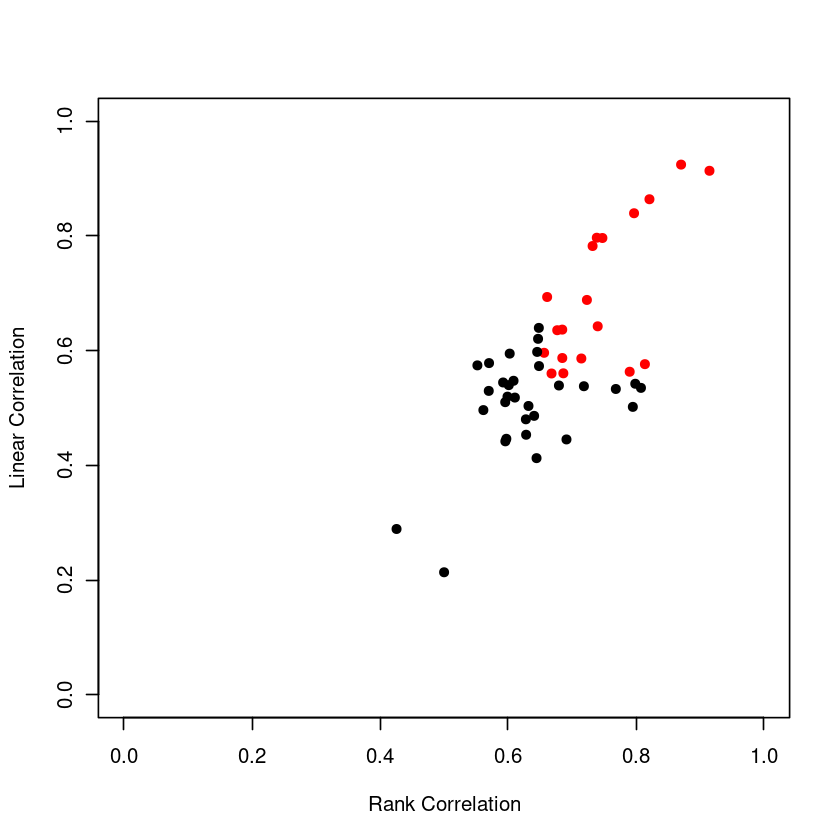

In [6]:
mybeer=BEER(DATA, BATCH, GNUM=30, PCNUM=50, ROUND=1, GN=2000, SEED=1, COMBAT=TRUE, RMG=NULL)   
# Check selected PCs
PCUSE=mybeer$select
COL=rep('black',length(mybeer$cor))
COL[PCUSE]='red'
plot(mybeer$cor,mybeer$lcor,pch=16,col=COL,
    xlab='Rank Correlation',ylab='Linear Correlation',xlim=c(0,1),ylim=c(0,1))

In [ ]:
# Keep batch effect

[1] "JCHAIN"          "IGHA1"           "LTF"             "IGHG1"          
   [5] "IGHV5-51"        "IGHV3-73"        "GNLY"            "IGLV2-23"       
   [9] "PRF1"            "ITGB2"           "LCN2"            "MMP8"           
  [13] "PRG3"            "IGKV3-20"        "HDC"             "MZB1"           
  [17] "OLFM4"           "LYZ"             "IGHV1-69"        "IGHV1-18"       
  [21] "C1QC"            "IGLV4-69"        "FRZB"            "IGLV3-19"       
  [25] "PRTN3"           "IGLV3-1"         "FOS"             "CEACAM8"        
  [29] "IGLV1-40"        "IGKV2-30"        "CRISP3"          "C1QB"           
  [33] "SELL"            "HLA-DRA"         "PTPRC"           "IGHV1-2"        
  [37] "IGHV4-31"        "IGHV4-59"        "IGLV1-44"        "LCP1"           
  [41] "HSPA5"           "MPO"             "IGKV3-15"        "HERPUD1"        
  [45] "NKG7"            "IGHV1-46"        "ALOX15"          "IGHM"           
  [49] "IGHV3-23"        "S100A9"          "IGHGP"           "FCN1"           
  [53] "VCAM1"           "CLC"             "IGHV3-7"         "FCER1A"         
  [57] "CXCL10"          "ELANE"           "CXCL8"           "IGHG2"          
  [61] "IGHG3"           "LAPTM5"          "C1QA"            "ANXA1"          
  [65] "HSP90B1"         "TCN1"            "CD177"           "GZMB"           
  [69] "BIRC7"           "IGLV7-43"        "MS4A3"           "MS4A1"          
  [73] "IGLV10-54"       "CPA3"            "IGLV3-21"        "IGLV3-25"       
  [77] "RPN2"            "TCL1A"           "KLRD1"           "DNTT"           
  [81] "IGHV3-15"        "PGBD4P4"         "VSIG4"           "IGKV3-11"       
  [85] "DEFA4"           "CXCL12"          "IGHV1-3"         "IGHV3-33"       
  [89] "IGLV1-47"        "GATA2"           "CCND1"           "HLA-DPA1"       
  [93] "CD5L"            "PDIA2"           "CAMP"            "MNDA"           
  [97] "ANXA3"           "IGKV1-9"         "VCAN"            "SERPINA1"       
 [101] "IL7R"            "CEACAM6"         "CD14"            "IGHV3-11"       
 [105] "PPBP"            "ZNF736P10Y"      "IGKV4-1"         "IGLC2"          
 [109] "SSR1P2"          "IGHV3-49"        "IGHV4-39"        "CHI3L1"         
 [113] "SPTSSB"          "GRN"             "CCL8"            "SEC11C"         
 [117] "PADI4"           "PGLYRP1"         "DEFB134"         "IGLV7-46"       
 [121] "CLDN5"           "FCGR3A"          "FPR1"            "IGKV2D-40"      
 [125] "BPI"             "HP"              "CTSW"            "CSF3R"          
 [129] "MRPS17P9"        "ASS1P6"          "IGLV8-61"        "PI3"            
 [133] "G0S2"            "LUM"             "ALPL"            "LINC01616"      
 [137] "TRBV19"          "MYO1F"           "RN7SL761P"       "FCF1P9"         
 [141] "RN7SL705P"       "FGR"             "TATDN2P1"        "BMP3"           
 [145] "MAGEA4"          "PLEK"            "IGLV4-3"         "QPCT"           
 [149] "RNU6-408P"       "CA4"             "DEFA3"           "PRSS33"         
 [153] "LINC02282"       "TSC22D3"         "MSLN"            "CXCR4"          
 [157] "RN7SKP136"       "CCNA1"           "TGFBI"           "MTND4P3"        
 [161] "RNASE3"          "VPREB1"          "APOE"            "ASH2LP1"        
 [165] "SAT1"            "CAVIN2"          "KRTAP8-2P"       "IGLV3-16"       
 [169] "MS4A6A"          "RPS17P11"        "UGT1A10"         "KRT16"          
 [173] "TAAR2"           "PDIA4"           "RPL7AP56"        "KRT23"          
 [177] "SLCO2B1"         "RN7SL808P"       "CCR7"            "XBP1"           
 [181] "VN1R25P"         "IGHVII-51-2"     "SHROOM2P1"       "IGHD"           
 [185] "RNU6-1161P"      "OR51A9P"         "EDNRB"           "IGHV4-28"       
 [189] "RIPOR2"          "TREML1"          "SALL4P1"         "LCK"            
 [193] "SFPQP1"          "S100B"           "OLFML3"          "DEFA8P"         
 [197] "CD36"            "OR2AK2"          "MAGEB6P1"        "CCL2"           
 [201] "IGLV1-51"        "RNASE1"          "IL1R2"   

Centering and scaling data matrix

PC_ 1 
Positive:  TYROBP 
Negative:  MZB1 

17:02:51 UMAP embedding parameters a = 0.9922 b = 1.112

17:02:51 Read 5144 rows and found 50 numeric columns

17:02:51 Using Annoy for neighbor search, n_neighbors = 30

17:02:51 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:02:52 Writing NN index file to temp file /tmp/RtmpiitCYI/file4fac7d5a77a2

17:02:52 Searching Annoy index using 1 thread, search_k = 3000

17:02:54 Annoy recall = 100%

17:02:55 Commencing smooth kNN distance calibration using 1 thread

17:02:57 Initializing from normalized Laplacian + noise

17:02:58 Commencing optimization for 500 epochs, with 216282 positive edges

17:03:16 Optimization finished



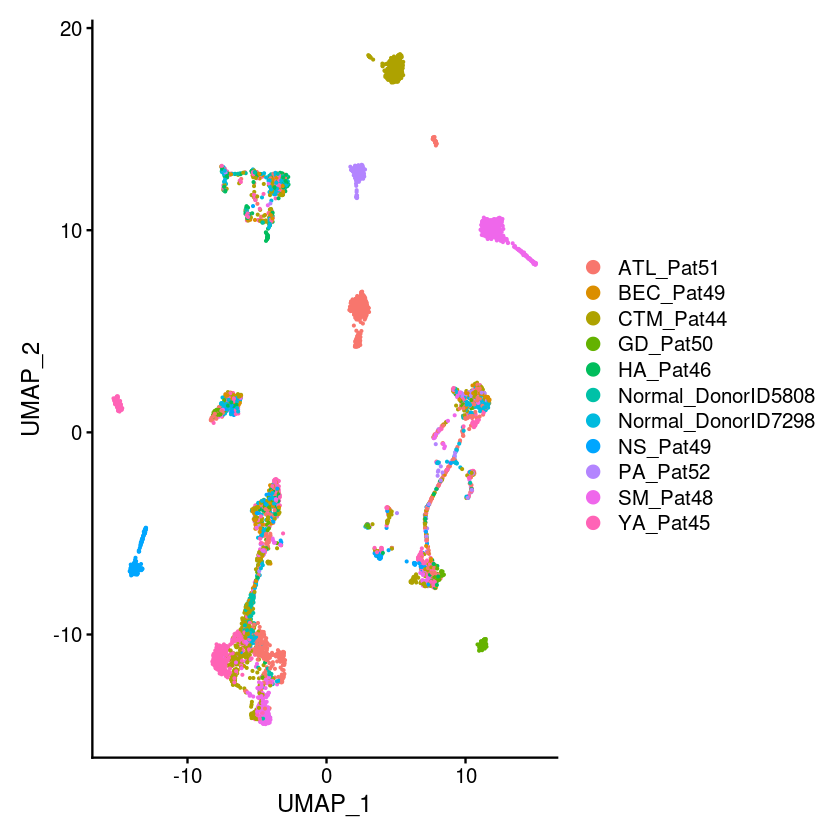

In [7]:
pbmc_batch=CreateSeuratObject(counts = DATA, min.cells = 0, min.features = 0, project = "ALL") 
pbmc_batch@meta.data$batch=BATCH
pbmc_batch=FindVariableFeatures(object = pbmc_batch, selection.method = "vst", nfeatures = 2000)   
VariableFeatures(object = pbmc_batch)
pbmc_batch <- NormalizeData(object = pbmc_batch, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_batch <- ScaleData(object = pbmc_batch, features = VariableFeatures(object = pbmc_batch))
pbmc_batch <- RunPCA(object = pbmc_batch, seed.use=123, npcs=50, features = VariableFeatures(object = pbmc_batch), ndims.print=1,nfeatures.print=1)
pbmc_batch <- RunUMAP(pbmc_batch, dims = 1:50, seed.use = 123,n.components=2)
DimPlot(pbmc_batch, reduction='umap', group.by='batch', pt.size=0.1) 

In [ ]:
# Remove batch effect

Warning message:
“The following arguments are not used: check_duplicates”
18:51:33 UMAP embedding parameters a = 0.9922 b = 1.112

18:51:33 Read 5144 rows and found 19 numeric columns

18:51:33 Using Annoy for neighbor search, n_neighbors = 30

18:51:33 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:51:34 Writing NN index file to temp file /tmp/RtmpIWCrEi/file7438223281ce

18:51:34 Searching Annoy index using 1 thread, search_k = 3000

18:51:36 Annoy recall = 100%

18:51:37 Commencing smooth kNN distance calibration using 1 thread

18:51:38 Initializing from normalized Laplacian + noise

18:51:39 Commencing optimization for 500 epochs, with 215400 positive edges

18:51:56 Optimization finished



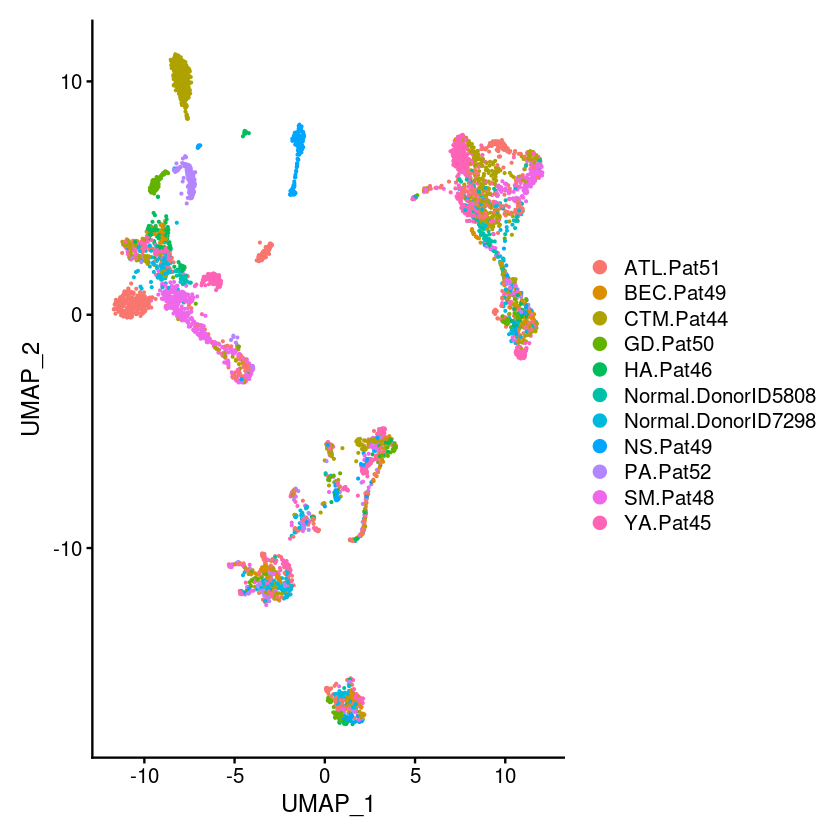

In [58]:
pbmc <- mybeer$seurat
PCUSE <- mybeer$select
pbmc <- RunUMAP(object = pbmc, reduction='pca',dims = PCUSE)

DimPlot(pbmc, reduction='umap', group.by='batch', pt.size=0.1) 

# BatchQC

In [2]:
library(BatchQC)

In [9]:
table(All_combined_ELO$Individual)


         ATL_Pat51          BEC_Pat49          CTM_Pat44           GD_Pat50 
               976                219                967                225 
          HA_Pat46 Normal_DonorID5808 Normal_DonorID7298           NS_Pat49 
               207                115                360                303 
          PA_Pat52           SM_Pat48           YA_Pat45 
               275                701                796 

In [10]:
test<-All_combined_ELO[,which(All_combined_ELO$Individual=="ATL_Pat51" |
                      All_combined_ELO$Individual=="BEC_Pat49"  |
                      All_combined_ELO$Individual=="CTM_Pat44" |
                      All_combined_ELO$Individual=="GD_Pat50" |
                      All_combined_ELO$Individual=="HA_Pat46" |
                      All_combined_ELO$Individual=="NS_Pat49" |
                      All_combined_ELO$Individual=="PA_Pat52" |
                      All_combined_ELO$Individual=="SM_Pat48" |
                      All_combined_ELO$Individual=="YA_Pat45" 
                      )]
req<-c(
colnames(All_combined_ELO[,which(All_combined_ELO$Individual=="ATL_Pat51")]),
colnames(All_combined_ELO[,which(All_combined_ELO$Individual=="BEC_Pat49")]),
colnames(All_combined_ELO[,which(All_combined_ELO$Individual=="CTM_Pat44")]),
colnames(All_combined_ELO[,which(All_combined_ELO$Individual=="GD_Pat50")]),
colnames(All_combined_ELO[,which(All_combined_ELO$Individual=="HA_Pat46")]),
colnames(All_combined_ELO[,which(All_combined_ELO$Individual=="NS_Pat49")]),
colnames(All_combined_ELO[,which(All_combined_ELO$Individual=="PA_Pat52")]),
colnames(All_combined_ELO[,which(All_combined_ELO$Individual=="SM_Pat48")]),
colnames(All_combined_ELO[,which(All_combined_ELO$Individual=="YA_Pat45")])
    )
test<-test[VariableFeatures(pbmc_batch),req]
test
batch<-test$Individual
table(batch)
condition<-test$Timepoint
table(condition)


class: SingleCellExperiment 
dim: 2000 4669 
metadata(0):
assays(3): counts logcounts logcounts_raw
rownames(2000): JCHAIN IGHA1 ... BATF2 LINC00890
rowData names(19): is_feature_control is_feature_control_MTs ...
  feature_symbol feature_id
colnames(4669):
  ELO_ATL_Pat51_EOT_BM_PC_010419_Plate1_CD38posCD138pos_SingleCell_H10_S155_rep1_NA
  ELO_ATL_Pat51_C5D1_BME_CD45pos_041919_Plate1_CD56pos_SingleCell_D7_S148_rep1_NA
  ...
  ELO_YA_Pat45_EOT_BM_PC_062519_Plate1_CD38posCD138pos_SingleCell_B4_S24_rep1_NA
  ELO_YA_Pat45_Screening_BME_CD45pos_012418_Plate1_CD45posTN_SingleCell_G6_S239_rep1_NA
colData names(68): sampleName Individual ... Phase SingleRCelltypeAnno
reducedDimNames(2): pagoda_largeVIS pagoda_tSNE
altExpNames(0):

batch
ATL_Pat51 BEC_Pat49 CTM_Pat44  GD_Pat50  HA_Pat46  NS_Pat49  PA_Pat52  SM_Pat48 
      976       219       967       225       207       303       275       701 
 YA_Pat45 
      796 

condition
     C3D1      C5D1       EOT Screening 
       97      1161      1001      2410 

In [5]:
test<-readRDS("test.rds")
test
batch<-test$Individual
table(batch)
condition<-test$Timepoint
table(condition)


class: SingleCellExperiment 
dim: 2000 4669 
metadata(0):
assays(3): counts logcounts logcounts_raw
rownames(2000): JCHAIN IGHA1 ... BATF2 LINC00890
rowData names(19): is_feature_control is_feature_control_MTs ...
  feature_symbol feature_id
colnames(4669):
  ELO_ATL_Pat51_EOT_BM_PC_010419_Plate1_CD38posCD138pos_SingleCell_H10_S155_rep1_NA
  ELO_ATL_Pat51_C5D1_BME_CD45pos_041919_Plate1_CD56pos_SingleCell_D7_S148_rep1_NA
  ...
  ELO_YA_Pat45_EOT_BM_PC_062519_Plate1_CD38posCD138pos_SingleCell_B4_S24_rep1_NA
  ELO_YA_Pat45_Screening_BME_CD45pos_012418_Plate1_CD45posTN_SingleCell_G6_S239_rep1_NA
colData names(68): sampleName Individual ... Phase SingleRCelltypeAnno
reducedDimNames(2): pagoda_largeVIS pagoda_tSNE
altExpNames(0):

batch
ATL_Pat51 BEC_Pat49 CTM_Pat44  GD_Pat50  HA_Pat46  NS_Pat49  PA_Pat52  SM_Pat48 
      976       219       967       225       207       303       275       701 
 YA_Pat45 
      796 

condition
     C3D1      C5D1       EOT Screening 
       97      1161      1001      2410 

In [ ]:
batchQC(as.data.frame(logcounts(test)), batch=batch, condition=condition, 
        report_file="batchqc_signature_data_report.html", report_dir=".", 
        report_option_binary="111111111",
        view_report=FALSE, interactive=TRUE)



processing file: batchqc_report.Rmd



  |.                                                                     |   2%
   inline R code fragments

  |...                                                                   |   4%
label: unnamed-chunk-1 (with options) 
List of 1
 $ echo: logi FALSE

  |....                                                                  |   6%
   inline R code fragments

  |.....                                                                 |   7%
label: unnamed-chunk-2 (with options) 
List of 3
 $ eval   : symbol eval_cell_1
 $ echo   : logi FALSE
 $ message: logi FALSE

  |......                                                                |   9%
   inline R code fragments

  |........                                                              |  11%
label: unnamed-chunk-3 (with options) 
List of 3
 $ eval   : symbol eval_cell_1
 $ echo   : logi FALSE
 $ message: logi FALSE

  |.........                                                             |  13%
   inline R code fragments

  |.

  |..................................................................... |  98%
   inline R code fragments

  |......................................................................| 100%
label: unnamed-chunk-27 (with options) 
List of 3
 $ eval   : symbol eval_cell_9
 $ echo   : logi FALSE
 $ message: logi FALSE




output file: batchqc_report.knit.md


Warning message:
“The vignette title specified in \VignetteIndexEntry{} is different from the title in the YAML metadata. The former is "", and the latter is "BatchQC Report". If that is intentional, you may set options(rmarkdown.html_vignette.check_title = FALSE) to suppress this check.”


/n/app/pandoc/2.1.1/bin/pandoc +RTS -K512m -RTS batchqc_report.utf8.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output /n/data2/dfci/pedonc/knoechel/Noori/Julia/batchqc_signature_data_report.html --lua-filter /home/nsc11/R-4.0.1-IRkernel/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /home/nsc11/R-4.0.1-IRkernel/library/rmarkdown/rmarkdown/lua/latex-div.lua --email-obfuscation none --standalone --section-divs --table-of-contents --toc-depth 2 --template batchQC.html --highlight-style pygments --css /home/nsc11/R-4.0.1-IRkernel/library/rmarkdown/rmarkdown/templates/html_vignette/resources/vignette.css --include-in-header /tmp/RtmpYwysxt/rmarkdown-str4b193f23a636.html --mathjax 



Output created: batchqc_signature_data_report.html

Loading required package: shiny


Listening on http://127.0.0.1:4717

